In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [387]:
df = pd.read_csv('C:/dataset/dataprep1.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Nigeria,18.0,15000.0,No


# cek dataset

In [388]:
df.shape

(29, 4)

In [389]:
df.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    28 non-null     object 
 1   Age        27 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  28 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.0+ KB


# Profiling Dataset

In [391]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Nigeria,18.0,15000.0,No


In [392]:
df.describe()

,Age,Salary
count,27.000000,28.000000
mean,36.925926,53642.857143
std,8.757089,19216.532785
min,18.000000,15000.000000
25%,30.000000,44750.000000
50%,37.000000,53000.000000
75%,44.000000,67000.000000
max,50.000000,83000.000000


In [393]:
# Counter adalah bagian dari modul collections di Python yang digunakan untuk menghitung jumlah kemunculan elemen dalam iterable (seperti list, tuple, atau string). 
from collections import Counter
Counter(df['Country'])

Counter({'France': 10, 'Spain': 7, 'Nigeria': 6, 'Germany': 5, nan: 1})

In [394]:
df.groupby('Country')['Country'].count()

Country
France     10
Germany     5
Nigeria     6
Spain       7
Name: Country, dtype: int64

In [395]:
Counter(df['Purchased'])

Counter({'Yes': 18, 'No': 10, nan: 1})

# Cek Data Duplikasi

In [396]:
# df.duplicated(keep=False) # output boolean

# menggunakan hasil ini untuk menyaring DataFrame dengan df[...] akan menampilkan baris-baris yang merupakan duplikat.
df[df.duplicated(keep=False)]


,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes
9,Germany,50.0,83000.0,No
10,France,37.0,67000.0,Yes
17,Spain,27.0,48000.0,Yes
22,Germany,50.0,83000.0,No
23,France,37.0,67000.0,Yes
26,France,37.0,67000.0,Yes


In [397]:
df = df.drop_duplicates()

# index harus di reset karena akan berantakan nanti indexnya karna ada penghapusan data null
df = df.reset_index(drop=True)

In [398]:
df.describe()

,Age,Salary
count,23.000000,24.000000
mean,36.782609,51541.666667
std,8.852101,19352.517344
min,18.000000,15000.000000
25%,30.000000,43750.000000
50%,37.000000,51000.000000
75%,44.000000,62500.000000
max,50.000000,83000.000000


# Hapus Missing Value

In [399]:
df.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,True,False,False
8,False,False,False,False
9,False,False,False,False


In [400]:
# Metode any(axis=1) digunakan dalam konteks ini untuk mengidentifikasi baris-baris dalam DataFrame yang memiliki setidaknya satu nilai NaN, dan hasilnya digunakan untuk 
# menyaring DataFrame asli sehingga hanya baris-baris tersebut yang disertakan dalam hasil.
df[df.isnull().any(axis=1)]


,Country,Age,Salary,Purchased
5,Germany,40.0,NaN,Yes
7,Spain,NaN,52000.0,No
13,NaN,44.0,45000.0,Yes
14,France,47.0,78000.0,NaN
19,Spain,NaN,57000.0,Yes


In [401]:
df.isnull().sum()

Country      1
Age          2
Salary       1
Purchased    1
dtype: int64

In [402]:
df.dropna(how='any', axis=0)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Nigeria,18.0,15000.0,No
6,France,35.0,58000.0,Yes
8,France,48.0,79000.0,Yes
9,Germany,50.0,83000.0,No
10,France,37.0,67000.0,Yes
11,Nigeria,50.0,60000.0,Yes


In [403]:
# menghapus missing value berdasarkan kolom
df.dropna(how='any', subset=['Purchased'])

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Nigeria,18.0,15000.0,No
5,Germany,40.0,NaN,Yes
6,France,35.0,58000.0,Yes
7,Spain,NaN,52000.0,No
8,France,48.0,79000.0,Yes
9,Germany,50.0,83000.0,No


# Cek outlier

<Axes: xlabel='Age'>

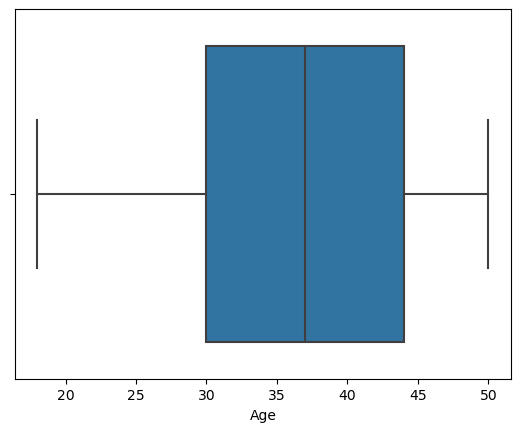

In [404]:
import seaborn as sns

sns.boxplot(x=df['Age'])

<Axes: xlabel='Age', ylabel='Purchased'>

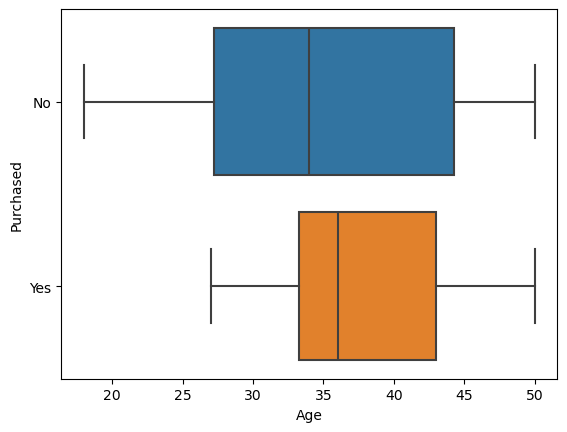

In [405]:
sns.boxplot(data=df, x='Age', y='Purchased')

<Axes: xlabel='Purchased', ylabel='Salary'>

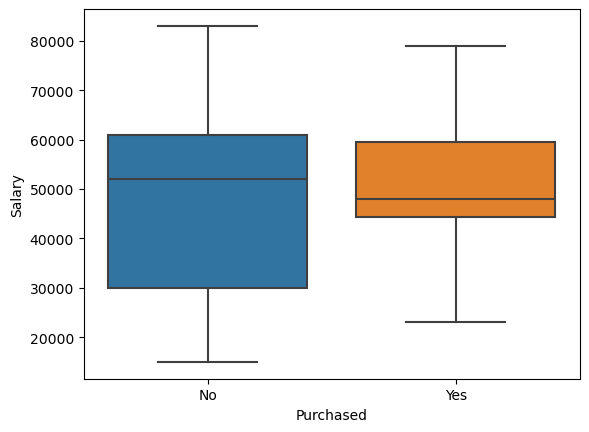

In [406]:
sns.boxplot(data=df, x='Purchased', y='Salary')

# Handling Missing Value

In [407]:
print(df['Age'].mean())
print(df['Age'].fillna(df['Age'].mean()))

36.78260869565217
0     44.000000
1     27.000000
2     30.000000
3     38.000000
4     18.000000
5     40.000000
6     35.000000
7     36.782609
8     48.000000
9     50.000000
10    37.000000
11    50.000000
12    22.000000
13    44.000000
14    47.000000
15    35.000000
16    34.000000
17    33.000000
18    29.000000
19    36.782609
20    44.000000
21    37.000000
22    45.000000
23    30.000000
24    29.000000
Name: Age, dtype: float64


In [408]:
# Imputing missing values on numerical features
print(df["Salary"].median())
print(df["Salary"].fillna(df["Salary"].median()))

51000.0
0     72000.0
1     48000.0
2     54000.0
3     61000.0
4     15000.0
5     51000.0
6     58000.0
7     52000.0
8     79000.0
9     83000.0
10    67000.0
11    60000.0
12    30000.0
13    45000.0
14    78000.0
15    43000.0
16    44000.0
17    48000.0
18    77000.0
19    57000.0
20    48000.0
21    23000.0
22    50000.0
23    30000.0
24    15000.0
Name: Salary, dtype: float64


In [409]:
print(df['Country'].fillna('Unknown'))

0      France
1       Spain
2     Germany
3       Spain
4     Nigeria
5     Germany
6      France
7       Spain
8      France
9     Germany
10     France
11    Nigeria
12     France
13    Unknown
14     France
15    Nigeria
16      Spain
17      Spain
18    Nigeria
19      Spain
20     France
21     France
22    Germany
23    Nigeria
24    Nigeria
Name: Country, dtype: object


In [410]:
print(df)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Nigeria  18.0  15000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11  Nigeria  50.0  60000.0       Yes
12   France  22.0  30000.0        No
13      NaN  44.0  45000.0       Yes
14   France  47.0  78000.0       NaN
15  Nigeria  35.0  43000.0       Yes
16    Spain  34.0  44000.0       Yes
17    Spain  33.0  48000.0       Yes
18  Nigeria  29.0  77000.0       Yes
19    Spain   NaN  57000.0       Yes
20   France  44.0  48000.0       Yes
21   France  37.0  23000.0       Yes
22  Germany  45.0  50000.0        No
23  Nigeria  30.0  30000.0       Yes
24  Nigeria  29.0  15000.0        No


In [453]:
df.Country.mode()

0    France
Name: Country, dtype: object

In [457]:
df['Age'].fillna(df['Age'].mean())

# Mengisi nilai yang hilang pada kolom 'Country' dengan mode (Frekuensi tertinggi)
df["Country"].fillna(df["Country"].mode()[0])

# Menghapus baris yang memiliki nilai 'NaN' pada kolom target 'Purchased'
df.dropna(subset=['Purchased','Salary'], inplace=True)

df['Salary'].fillna(df['Salary'].median())
# Mereset indeks
df.reset_index(drop=True, inplace=True)
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.0,No
1,Spain,27.000000,48000.0,Yes
2,Germany,30.000000,54000.0,No
3,Spain,38.000000,61000.0,No
4,Nigeria,18.000000,15000.0,No
5,France,35.000000,58000.0,Yes
6,Spain,36.782609,52000.0,No
7,France,48.000000,79000.0,Yes
8,Germany,50.000000,83000.0,No
9,France,37.000000,67000.0,Yes


In [458]:
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [459]:
df.shape

(23, 4)

# Splitting Dataset

In [460]:
# spliting data dependen ke independen
X = df[['Country','Age','Salary']]
y = df['Purchased'].values
X

,Country,Age,Salary
0,France,44.000000,72000.0
1,Spain,27.000000,48000.0
2,Germany,30.000000,54000.0
3,Spain,38.000000,61000.0
4,Nigeria,18.000000,15000.0
5,France,35.000000,58000.0
6,Spain,36.782609,52000.0
7,France,48.000000,79000.0
8,Germany,50.000000,83000.0
9,France,37.000000,67000.0


In [461]:
y

array(['No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No'], dtype=object)

# Encoding data

In [462]:
from sklearn.preprocessing import OneHotEncoder

ct = OneHotEncoder()
Xct = pd.DataFrame(ct.fit_transform(X[["Country"]]).toarray(),
                   columns=ct.get_feature_names_out())
X = pd.concat([X, Xct], axis=1)
X.drop(columns=["Country"], inplace=True)

In [463]:
X.head()

,Age,Salary,Country_France,Country_Germany,Country_Nigeria,Country_Spain
0,44.0,72000.0,1.0,0.0,0.0,0.0
1,27.0,48000.0,0.0,0.0,0.0,1.0
2,30.0,54000.0,0.0,1.0,0.0,0.0
3,38.0,61000.0,0.0,0.0,0.0,1.0
4,18.0,15000.0,0.0,0.0,1.0,0.0


In [464]:
# one hot encoding menggunakan pandas
pd.get_dummies(df.drop(columns = ["Purchased"]),dtype=int)

,Age,Salary,Country_France,Country_Germany,Country_Nigeria,Country_Spain
0,44.000000,72000.0,1,0,0,0
1,27.000000,48000.0,0,0,0,1
2,30.000000,54000.0,0,1,0,0
3,38.000000,61000.0,0,0,0,1
4,18.000000,15000.0,0,0,1,0
5,35.000000,58000.0,1,0,0,0
6,36.782609,52000.0,0,0,0,1
7,48.000000,79000.0,1,0,0,0
8,50.000000,83000.0,0,1,0,0
9,37.000000,67000.0,1,0,0,0


# Label Encoding

In [465]:
print(y)

['No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No']


In [466]:
# encoding untuk variabel target
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [467]:
print(y)

[0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0]


# Spliting Data

In [468]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [469]:
X_train.shape

(18, 6)

In [470]:
X_test.shape

(5, 6)

# Feature Scaling

In [471]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
mm = MinMaxScaler()

X_train = ss.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [472]:
print(X_train)

[[-0.75678856  1.34235968 -0.79772404 -0.35355339  1.61245155 -0.53452248]
 [ 0.25825614  0.52846581 -0.79772404 -0.35355339 -0.62017367  1.87082869]
 [ 0.93495261 -0.28542806  1.25356634 -0.35355339 -0.62017367 -0.53452248]
 [ 0.14547339  0.83367601  1.25356634 -0.35355339 -0.62017367 -0.53452248]
 [-1.99739875 -1.81147906 -0.79772404 -0.35355339  1.61245155 -0.53452248]
 [ 1.61164907  0.47759744 -0.79772404 -0.35355339  1.61245155 -0.53452248]
 [-0.08009209  0.37586071  1.25356634 -0.35355339 -0.62017367 -0.53452248]
 [ 0.12095541  0.32499234 -0.79772404 -0.35355339 -0.62017367  1.87082869]
 [-0.98235405 -0.13282296 -0.79772404 -0.35355339 -0.62017367  1.87082869]
 [-0.64400582  0.17238724 -0.79772404  2.82842712 -0.62017367 -0.53452248]
 [ 1.38608358  1.44409641  1.25356634 -0.35355339 -0.62017367 -0.53452248]
 [ 0.14547339 -1.40453213  1.25356634 -0.35355339 -0.62017367 -0.53452248]
 [ 0.93495261 -0.13282296  1.25356634 -0.35355339 -0.62017367 -0.53452248]
 [-1.54626777 -1.04845356